Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

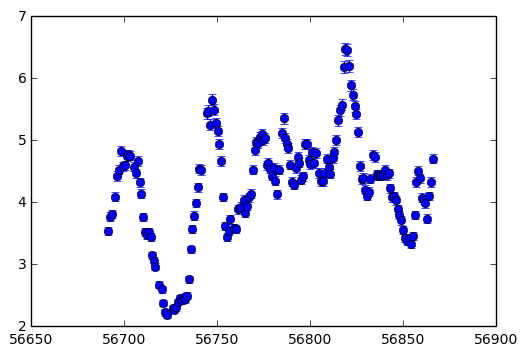

In [1]:
import numpy as np
import sys
import getopt
sys.path.insert(1,"/usr/local/science/clag/")
import clag
%pylab inline

from scipy.stats import norm
from scipy.stats import lognorm

ref_file="lc/1367A.lc"
echo_file="lc/9157A.lc"


dt = 0.01
t1, l1, l1e = np.loadtxt(ref_file).T
errorbar(t1, l1, yerr=l1e, fmt='o')

In [2]:


fqL = np.array([0.0049999999, 0.018619375, 0.044733049, 0.069336227, 0.10747115, 0.16658029, 
                0.25819945, 0.40020915, 0.62032418])
# fqL = np.logspace(np.log10(0.0006),np.log10(1.2),11)
nfq = len(fqL) - 1
fqd = 10**(np.log10( (fqL[:-1]*fqL[1:]) )/2.)


fqd




array([ 0.00964867,  0.02886003,  0.0556922 ,  0.08632291,  0.13380051,
        0.20739079,  0.32145572,  0.49825637])

In [3]:
P1 = clag.clag('psd10r', [t1], [l1], [l1e], dt, fqL)
p1 = np.ones(nfq)
p1, p1e = clag.optimize(P1, p1)

   1 4.342e-01 5.077e+01 inf -- -5.530e+02 -- 1 1 1 1 1 1 1 1
   2 7.674e-01 5.065e+01 8.300e+01 -- -4.700e+02 -- 0.653018 0.587019 0.568277 0.567457 0.566281 0.566085 0.565773 0.566163
   3 3.298e+00 5.043e+01 8.075e+01 -- -3.893e+02 -- 0.414806 0.209135 0.141159 0.13784 0.133393 0.132728 0.131612 0.132761
   4 1.572e+00 5.010e+01 7.754e+01 -- -3.117e+02 -- 0.322539 -0.0834456 -0.273066 -0.284295 -0.297612 -0.299435 -0.302479 -0.300412
   5 5.908e-01 4.964e+01 7.386e+01 -- -2.379e+02 -- 0.302357 -0.214604 -0.654658 -0.688754 -0.723838 -0.729279 -0.736418 -0.733888
   6 3.713e-01 4.877e+01 6.953e+01 -- -1.683e+02 -- 0.284419 -0.200357 -0.96379 -1.05472 -1.13798 -1.15477 -1.17031 -1.16748
   7 2.709e-01 4.671e+01 6.269e+01 -- -1.056e+02 -- 0.277768 -0.185001 -1.13047 -1.34026 -1.52128 -1.56845 -1.6043 -1.60101
   8 2.135e-01 4.361e+01 5.281e+01 -- -5.282e+01 -- 0.277012 -0.185189 -1.16375 -1.49463 -1.83211 -1.9477 -2.03737 -2.03476
   9 1.764e-01 3.767e+01 4.019e+01 -- -1.264e+01 -- 0.2

In [4]:
p1, p1e = clag.errors(P1, p1, p1e)

	### errors for param 0 ###
+++ 3.525e+01 3.480e+01 3.006e-01 5.395e-01 0.891 +++
+++ 3.525e+01 3.431e+01 3.006e-01 6.590e-01 1.87 +++
+++ 3.525e+01 3.458e+01 3.006e-01 5.993e-01 1.34 +++
+++ 3.525e+01 3.469e+01 3.006e-01 5.694e-01 1.11 +++
+++ 3.525e+01 3.475e+01 3.006e-01 5.545e-01 0.997 +++
	### errors for param 1 ###
+++ 3.525e+01 3.476e+01 -1.781e-01 2.430e-02 0.973 +++
+++ 3.525e+01 3.421e+01 -1.781e-01 1.255e-01 2.07 +++
+++ 3.525e+01 3.451e+01 -1.781e-01 7.491e-02 1.48 +++
+++ 3.525e+01 3.464e+01 -1.781e-01 4.961e-02 1.21 +++
+++ 3.525e+01 3.470e+01 -1.781e-01 3.696e-02 1.09 +++
+++ 3.525e+01 3.473e+01 -1.781e-01 3.063e-02 1.03 +++
+++ 3.525e+01 3.475e+01 -1.781e-01 2.747e-02   1 +++
	### errors for param 2 ###
+++ 3.525e+01 3.511e+01 -1.191e+00 -1.074e+00 0.276 +++
+++ 3.525e+01 3.495e+01 -1.191e+00 -1.016e+00 0.598 +++
+++ 3.525e+01 3.485e+01 -1.191e+00 -9.870e-01 0.8 +++
+++ 3.525e+01 3.479e+01 -1.191e+00 -9.725e-01 0.91 +++
+++ 3.525e+01 3.476e+01 -1.191e+00 -9.652e-01 0.96

<Container object of 3 artists>

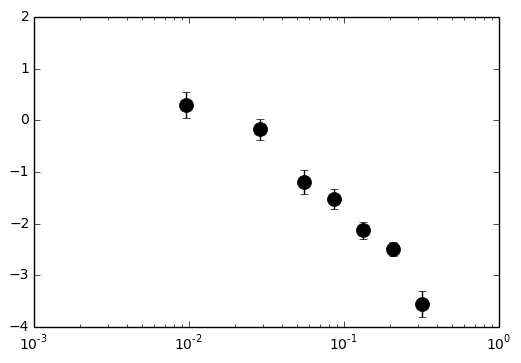

In [5]:
xscale('log'); ylim(-4,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="black")


<Container object of 3 artists>

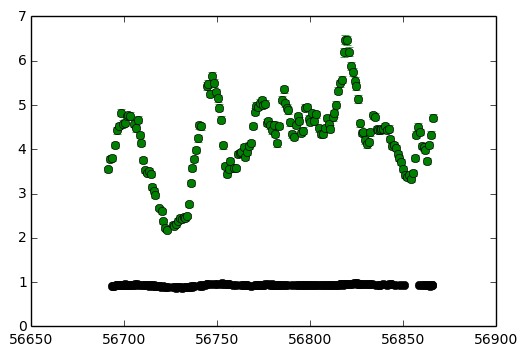

In [6]:
t2, l2, l2e = np.loadtxt(echo_file).T
errorbar(t1, l1, yerr=l1e, fmt='o', color="green")
errorbar(t2, l2, yerr=l2e, fmt='o', color="black")

In [7]:
P2 = clag.clag('psd10r', [t2], [l2], [l2e], dt, fqL)
p2 = np.ones(nfq)
p2, p2e = clag.optimize(P2, p2)

   1 4.359e-01 7.161e+01 inf -- -2.181e+02 -- 1 1 1 1 1 1 1 1
   2 7.742e-01 7.111e+01 8.740e+01 -- -1.307e+02 -- 0.564074 0.564103 0.564133 0.564559 0.565233 0.56464 0.564848 0.564132
   3 3.436e+00 7.050e+01 8.697e+01 -- -4.372e+01 -- 0.13087 0.128441 0.128217 0.128912 0.13058 0.129543 0.129728 0.127363
   4 1.429e+00 6.964e+01 8.635e+01 -- 4.262e+01 -- -0.295217 -0.304667 -0.307069 -0.306748 -0.303835 -0.30536 -0.305448 -0.310246
   5 5.887e-01 6.841e+01 8.530e+01 -- 1.279e+02 -- -0.704126 -0.731704 -0.741301 -0.742618 -0.738088 -0.740228 -0.740922 -0.748518
   6 3.715e-01 6.674e+01 8.354e+01 -- 2.115e+02 -- -1.07182 -1.14488 -1.17363 -1.17921 -1.17251 -1.17519 -1.17707 -1.18728
   7 2.720e-01 6.454e+01 8.085e+01 -- 2.923e+02 -- -1.35117 -1.52737 -1.60252 -1.61695 -1.60778 -1.61012 -1.61437 -1.62665
   8 2.151e-01 6.151e+01 7.746e+01 -- 3.698e+02 -- -1.49897 -1.84925 -2.02742 -2.05591 -2.04475 -2.04475 -2.05353 -2.06755
   9 1.795e-01 5.724e+01 7.348e+01 -- 4.433e+02 -- -1.55318 -2.

In [8]:
p2, p2e = clag.errors(P2, p2, p2e)

	### errors for param 0 ###
+++ 6.798e+02 6.794e+02 -1.573e+00 -1.336e+00 0.88 +++
+++ 6.798e+02 6.789e+02 -1.573e+00 -1.217e+00 1.85 +++
+++ 6.798e+02 6.791e+02 -1.573e+00 -1.277e+00 1.33 +++
+++ 6.798e+02 6.793e+02 -1.573e+00 -1.306e+00 1.09 +++
+++ 6.798e+02 6.793e+02 -1.573e+00 -1.321e+00 0.984 +++
+++ 6.798e+02 6.793e+02 -1.573e+00 -1.314e+00 1.04 +++
+++ 6.798e+02 6.793e+02 -1.573e+00 -1.317e+00 1.01 +++
+++ 6.798e+02 6.793e+02 -1.573e+00 -1.319e+00 0.998 +++
	### errors for param 1 ###
+++ 6.798e+02 6.794e+02 -2.221e+00 -2.020e+00 0.889 +++
+++ 6.798e+02 6.789e+02 -2.221e+00 -1.919e+00 1.88 +++
+++ 6.798e+02 6.791e+02 -2.221e+00 -1.969e+00 1.35 +++
+++ 6.798e+02 6.792e+02 -2.221e+00 -1.994e+00 1.11 +++
+++ 6.798e+02 6.793e+02 -2.221e+00 -2.007e+00 0.996 +++
	### errors for param 2 ###
+++ 6.798e+02 6.793e+02 -3.785e+00 -3.500e+00 0.976 +++
+++ 6.798e+02 6.787e+02 -3.785e+00 -3.358e+00 2.11 +++
+++ 6.798e+02 6.791e+02 -3.785e+00 -3.429e+00 1.49 +++
+++ 6.798e+02 6.792e+02 -3.785e

<Container object of 3 artists>

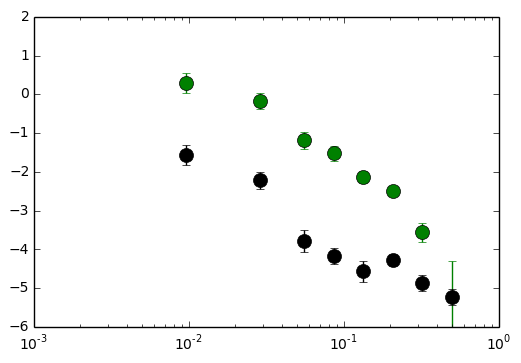

In [9]:
xscale('log'); ylim(-6,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="green")
errorbar(fqd, p2, yerr=p2e, fmt='o', ms=10, color="black")

In [10]:
Cx = clag.clag('cxd10r', [[t1,t2]], [[l1,l2]], [[l1e,l2e]], dt, fqL, p1, p2)
p  = np.concatenate( ((p1+p2)*0.5-0.3,p1*0+0.1) ) # a  good starting point generally
p, pe = clag.optimize(Cx, p)

   1 4.263e+02 8.743e+00 inf -- 7.200e+02 -- -0.936223 -1.49944 -2.78774 -3.1451 -3.64922 -3.68468 -4.51464 -6.91491 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
   3 4.860e+01 9.447e+00 3.012e+00 -- 7.230e+02 -- -0.89632 -1.47767 -2.84644 -3.16314 -3.6728 -3.70288 -4.53842 -6.61491 0.0812657 0.222203 0.312409 0.206336 0.095992 0.137977 -0.0249432 2.12014
   5 1.834e+02 1.086e+01 2.400e+00 -- 7.254e+02 -- -0.863738 -1.45362 -2.88196 -3.17521 -3.69408 -3.71906 -4.5538 -6.91491 0.0679893 0.320406 0.548492 0.312861 0.089923 0.174248 -0.146165 0.867841
   7 2.704e+01 1.233e+01 1.965e+00 -- 7.273e+02 -- -0.83671 -1.42964 -2.88961 -3.18149 -3.71318 -3.73336 -4.56179 -6.61491 0.0582761 0.398604 0.784091 0.415604 0.0825065 0.208572 -0.259049 -2.48409
   9 8.381e+01 1.445e+01 1.699e+00 -- 7.290e+02 -- -0.814012 -1.40696 -2.87289 -3.18272 -3.73036 -3.74595 -4.56372 -6.91491 0.0510133 0.460993 0.990591 0.511606 0.0740674 0.240773 -0.360623 -2.05029
  11 5.382e+01 1.673e+01 1.479e+00 -- 7.305e+02 -- -0.794769 

In [11]:
%autoreload
p, pe = clag.errors(Cx, p, pe)

ERROR:root:Line magic function `%autoreload` not found.


	### errors for param 0 ###
+++ 7.469e+02 7.467e+02 -6.605e-01 -6.530e-01 0.383 +++
+++ 7.469e+02 7.463e+02 -6.605e-01 -6.492e-01 1.15 +++
+++ 7.469e+02 7.466e+02 -6.605e-01 -6.511e-01 0.685 +++
+++ 7.469e+02 7.465e+02 -6.605e-01 -6.502e-01 0.892 +++
+++ 7.469e+02 7.464e+02 -6.605e-01 -6.497e-01 1.01 +++
+++ 7.469e+02 7.464e+02 -6.605e-01 -6.499e-01 0.95 +++
+++ 7.469e+02 7.464e+02 -6.605e-01 -6.498e-01 0.981 +++
+++ 7.469e+02 7.464e+02 -6.605e-01 -6.497e-01 0.997 +++
	### errors for param 1 ###
+++ 7.469e+02 7.467e+02 -1.208e+00 -1.205e+00 0.378 +++
+++ 7.469e+02 7.464e+02 -1.208e+00 -1.204e+00 1.1 +++
+++ 7.469e+02 7.466e+02 -1.208e+00 -1.205e+00 0.668 +++
+++ 7.469e+02 7.465e+02 -1.208e+00 -1.204e+00 0.864 +++
+++ 7.469e+02 7.464e+02 -1.208e+00 -1.204e+00 0.977 +++
+++ 7.469e+02 7.464e+02 -1.208e+00 -1.204e+00 1.04 +++
+++ 7.469e+02 7.464e+02 -1.208e+00 -1.204e+00 1.01 +++
	### errors for param 2 ###
+++ 7.469e+02 7.467e+02 -2.497e+00 -2.486e+00 0.424 +++
+++ 7.469e+02 7.461e+02 -2.

In [12]:
phi, phie = p[nfq:], pe[nfq:]
lag, lage = phi/(2*np.pi*fqd), phie/(2*np.pi*fqd)    
cx, cxe   = p[:nfq], pe[:nfq]

array([ 0.79565312,  4.2489229 ,  5.00370082,  2.18467546,  0.17899829,
        0.37113758, -0.47082688, -0.17915708])

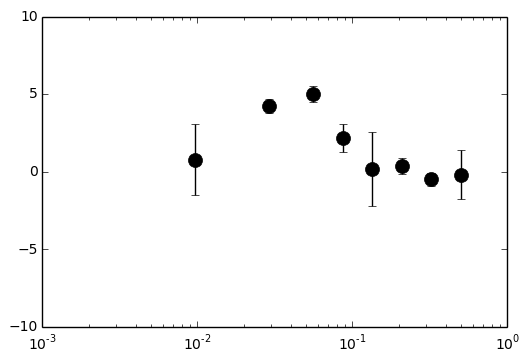

In [13]:


xscale('log'); ylim(-10,10)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")

lag

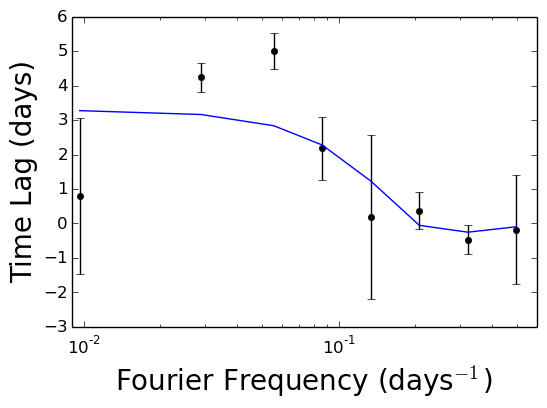

In [34]:
from scipy.optimize import curve_fit

# Define model function to be used to fit to the data above:
def tophat_time(x, *p):
    mean, width = p
    if x>(mean+width): y=0
    if x<(mean-width): y=0
    if x==(mean+width) | x==(mean-width): y=5
    return y

def tophat_freq(f, *pars):
    A,T,t0 = pars
    #return A*T*sinc(pi*f*T)*exp(-i*2*pi*f*t0)
    return A*T*sinc(pi*f*T)*cos(2*pi*f*t0)

x=np.logspace(fqd[0],fqd[-1],200)

# p0 is the initial guess for the fitting coefficients
p0 = [3, 3, 3]
coeff, var_matrix = curve_fit(tophat_freq, fqd, lag, p0)
fit = tophat_freq(fqd, *coeff)


mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
xscale('log'); xlim(.009,.6)
xlabel("Fourier Frequency (days$^{-1}$)",fontsize=20)
ylabel("Time Lag (days)",fontsize=20)


errorbar(fqd, lag, yerr=lage, fmt='o', ms=5,color="black")
plot(fqd,fit)

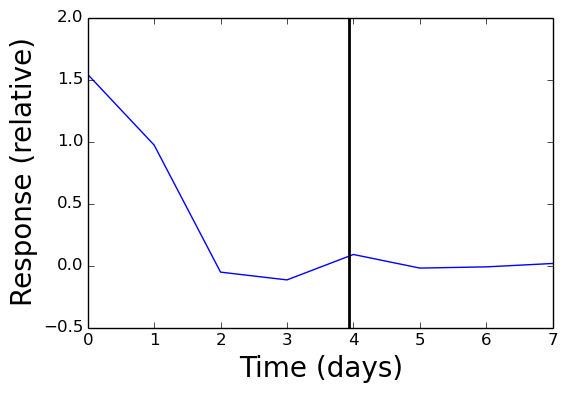

In [37]:
time_fit = irfft(fit)

mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
ylabel("Response (relative)",fontsize=20)
xlabel("Time (days)",fontsize=20) 

ylim(-0.5,2)
xlim(0,7)

plot(time_fit)
plot([3.93,3.93], [-50, 50], color='k', linestyle='-', linewidth=2)